In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
dec = pd.read_csv("../Resources/Dec_clean_data.csv")
nov = pd.read_csv("../Resources/Nov_clean_data.csv")
sep = pd.read_csv("../Resources/Sept_clean_data.csv")

In [3]:
dec.columns

Index(['s.no', 'Youtube_channel', 'Youtuber_name', 'Category', 'Subscribers',
       'Country', 'Average_view', 'Average_likes', 'Average_comments',
       'Sub-category', 'Date'],
      dtype='object')

In [4]:
stacked_df = pd.concat([dec, nov, sep], ignore_index=True, sort=False)
stacked_df

,s.no,Youtube_channel,Youtuber_name,Category,Subscribers,Country,Average_view,Average_likes,Average_comments,Sub-category,Date,\r\nViews (Avg.),S.no
0,1.0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,Others,12/8/2022,NaN,NaN
1,2.0,setindia,SET India,Others,147.2M,India,0,0,0,Others,12/27/2022,NaN,NaN
2,4.0,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,12/19/2022,NaN,NaN
3,5.0,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,Others,12/28/2022,NaN,NaN
4,8.0,WWEFanNation,WWE,Video games,91.8M,United States,144.9K,5.1K,207,Others,12/2/2022,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,NaN,Raditya Dika,Raditya Dika,Food & Drinks,9.9M,Indonesia,430.5K,14.8K,741,Other,9/13/2022,NaN,996.0
2643,NaN,Ini Talk Show,IniTalkShow,Music & Dance,9.9M,Indonesia,25.2K,290,17,Humor,9/9/2022,NaN,997.0
2644,NaN,SpriteDer SPD,SpriteDer SPD,Humor,9.9M,Thailand,4.4M,154.4K,3.6K,Other,9/16/2022,NaN,998.0
2645,NaN,Classic Mr Bean,Classic Mr Bean,Other,9.9M,India,132.6K,1.1K,53,Other,9/30/2022,NaN,999.0


In [5]:
# Define a function named convert_to_numeric which takes a single argument 'value'.
def convert_to_numeric(value):
    # Define a dictionary named suffixes where keys are string representations of suffixes like 'k', 'M', etc.,
    # and values are the corresponding numeric multiplier values (e.g., 'k' is mapped to 1000).
    suffixes = {
        'k': 10**3,
        'K': 10**3,
        'm': 10**6,
        'M': 10**6,
        'b': 10**9,
        'B': 10**9
    }
    # Check if 'value' is a string, if its characters (except the last one) are digits or a dot,
    # and if its last character is in the suffixes dictionary.
    if isinstance(value, str) and value[:-1].replace('.', '').isdigit() and value[-1] in suffixes:
        # If all conditions are met, convert the string value (excluding the last character) to float,
        # multiply it by the corresponding multiplier from the suffixes dictionary,
        # and return the result.
        return float(value[:-1]) * suffixes[value[-1]]
    # If 'value' is either an integer or a float and its value is less than 1000,
    # return 'value' as is (no conversion).
    elif isinstance(value, (int, float)) and value < 1000:
        return value
    # If 'value' is a string composed entirely of digits, convert it to float and return.
    elif isinstance(value, str) and value.isdigit():
        return float(value)
    # If none of the above conditions are met, return NaN (Not a Number) float value.
    else:
        return float('NaN')  # or any other handling for invalid values

# Define a list named numeric_cols containing the column names
# for which the conversion function convert_to_numeric will be applied.
numeric_cols = ['Subscribers', 'Average_view', 'Average_likes', 'Average_comments']

# Loop through each column name in the numeric_cols list.
for col in numeric_cols:
    # Apply the convert_to_numeric function to each column in the DataFrame 'stacked_df'.
    stacked_df[col] = stacked_df[col].apply(convert_to_numeric)


In [6]:
stacked_df

,s.no,Youtube_channel,Youtuber_name,Category,Subscribers,Country,Average_view,Average_likes,Average_comments,Sub-category,Date,\r\nViews (Avg.),S.no
0,1.0,tseries,T-Series,Music & Dance,229500000.0,India,103800.0,2800.0,158.0,Others,12/8/2022,NaN,NaN
1,2.0,setindia,SET India,Others,147200000.0,India,0.0,0.0,0.0,Others,12/27/2022,NaN,NaN
2,4.0,MrBeast,MrBeast,Video games,117000000.0,United States,68500000.0,2900000.0,99900.0,Humor,12/19/2022,NaN,NaN
3,5.0,PewDiePie,PewDiePie,Animation,111600000.0,United States,1400000.0,110700.0,7800.0,Others,12/28/2022,NaN,NaN
4,8.0,WWEFanNation,WWE,Video games,91800000.0,United States,144900.0,5100.0,207.0,Others,12/2/2022,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,NaN,Raditya Dika,Raditya Dika,Food & Drinks,9900000.0,Indonesia,430500.0,14800.0,741.0,Other,9/13/2022,NaN,996.0
2643,NaN,Ini Talk Show,IniTalkShow,Music & Dance,9900000.0,Indonesia,25200.0,290.0,17.0,Humor,9/9/2022,NaN,997.0
2644,NaN,SpriteDer SPD,SpriteDer SPD,Humor,9900000.0,Thailand,4400000.0,154400.0,3600.0,Other,9/16/2022,NaN,998.0
2645,NaN,Classic Mr Bean,Classic Mr Bean,Other,9900000.0,India,132600.0,1100.0,53.0,Other,9/30/2022,NaN,999.0


In [7]:
stacked_df['s.no'].fillna(stacked_df['S.no'], inplace=True)
stacked_df.drop(columns=['S.no'], inplace=True)
stacked_df

,s.no,Youtube_channel,Youtuber_name,Category,Subscribers,Country,Average_view,Average_likes,Average_comments,Sub-category,Date,\r\nViews (Avg.)
0,1.0,tseries,T-Series,Music & Dance,229500000.0,India,103800.0,2800.0,158.0,Others,12/8/2022,NaN
1,2.0,setindia,SET India,Others,147200000.0,India,0.0,0.0,0.0,Others,12/27/2022,NaN
2,4.0,MrBeast,MrBeast,Video games,117000000.0,United States,68500000.0,2900000.0,99900.0,Humor,12/19/2022,NaN
3,5.0,PewDiePie,PewDiePie,Animation,111600000.0,United States,1400000.0,110700.0,7800.0,Others,12/28/2022,NaN
4,8.0,WWEFanNation,WWE,Video games,91800000.0,United States,144900.0,5100.0,207.0,Others,12/2/2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2642,996.0,Raditya Dika,Raditya Dika,Food & Drinks,9900000.0,Indonesia,430500.0,14800.0,741.0,Other,9/13/2022,NaN
2643,997.0,Ini Talk Show,IniTalkShow,Music & Dance,9900000.0,Indonesia,25200.0,290.0,17.0,Humor,9/9/2022,NaN
2644,998.0,SpriteDer SPD,SpriteDer SPD,Humor,9900000.0,Thailand,4400000.0,154400.0,3600.0,Other,9/16/2022,NaN
2645,999.0,Classic Mr Bean,Classic Mr Bean,Other,9900000.0,India,132600.0,1100.0,53.0,Other,9/30/2022,NaN


In [8]:
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   s.no              2647 non-null   float64
 1   Youtube_channel   2647 non-null   object 
 2   Youtuber_name     2647 non-null   object 
 3   Category          2647 non-null   object 
 4   Subscribers       2647 non-null   float64
 5   Country           2647 non-null   object 
 6   Average_view      1647 non-null   float64
 7   Average_likes     2647 non-null   float64
 8   Average_comments  2647 non-null   float64
 9   Sub-category      2647 non-null   object 
 10  Date              2647 non-null   object 
 11  
Views (Avg.)    998 non-null    object 
dtypes: float64(5), object(7)
memory usage: 248.3+ KB


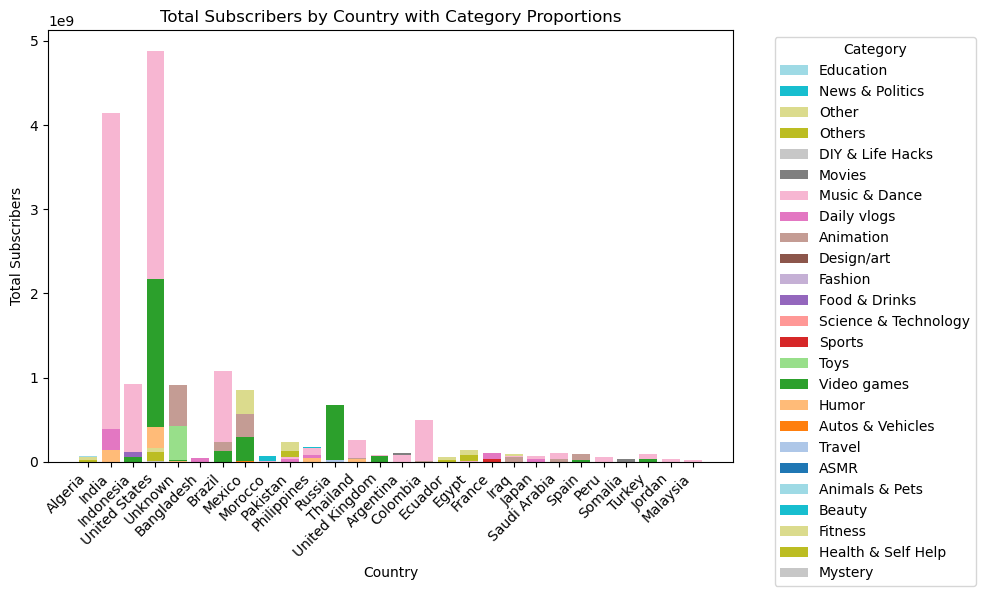

In [9]:
import matplotlib.pyplot as plt
import numpy as np

country_subscribers = stacked_df.groupby('Country')['Subscribers'].sum()
country_category_counts = stacked_df.groupby(['Country', 'Category']).size()
categories = country_category_counts.index.get_level_values('Category').unique()

color_map = plt.get_cmap('tab20_r')

fig, ax = plt.subplots(figsize=(10, 6))

for i, category in enumerate(categories):
    country_subscribers_category = stacked_df[stacked_df['Category'] == category].groupby('Country')['Subscribers'].sum()
    
    color_index = i % len(color_map.colors)
    ax.bar(country_subscribers_category.index, country_subscribers_category.values, label=category, color=color_map(color_index))

ax.set_xlabel('Country')
ax.set_ylabel('Total Subscribers')
ax.set_title('Total Subscribers by Country with Category Proportions')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\aKost\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\aKost\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


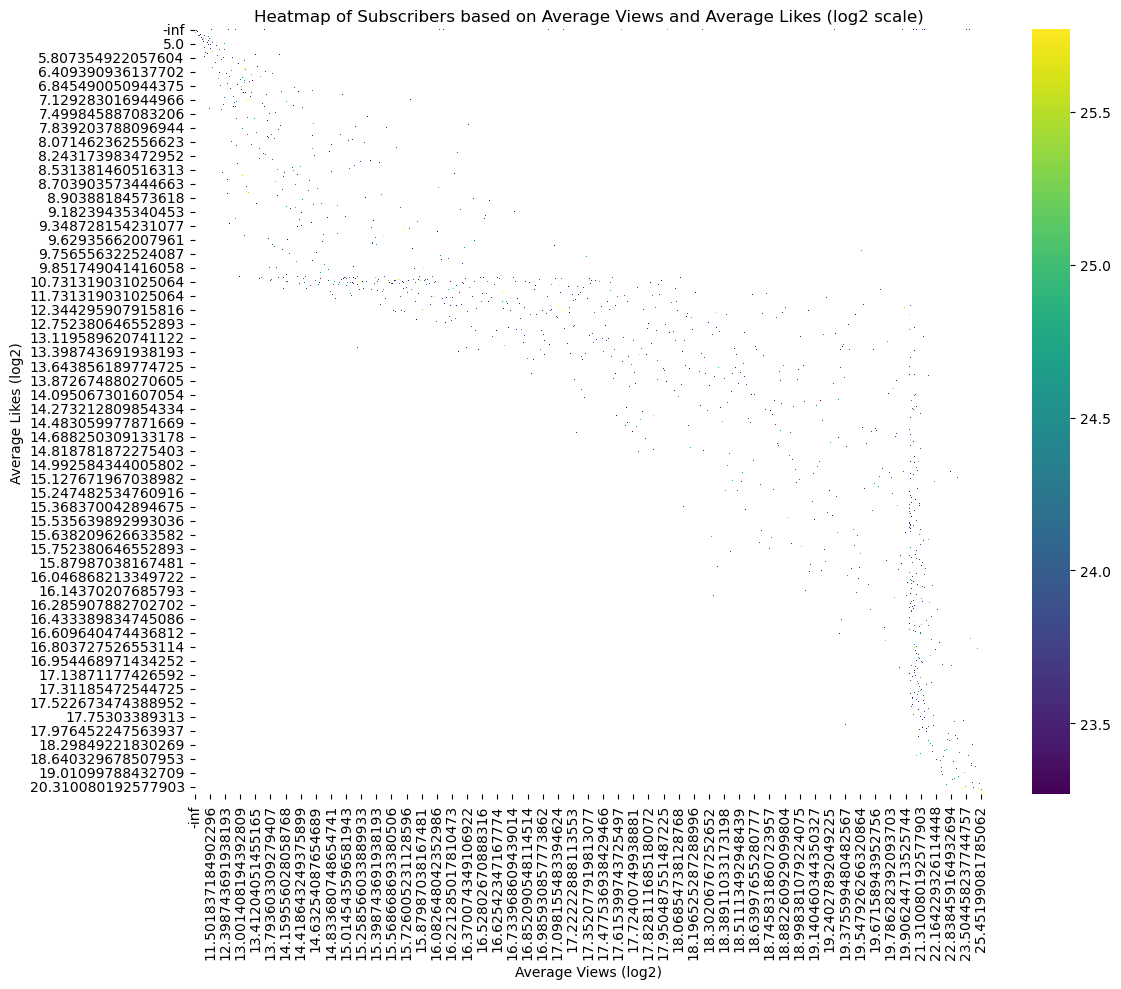

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply log2 scaling to the necessary columns
stacked_df['Average_view_log2'] = np.log2(stacked_df['Average_view'])
stacked_df['Average_likes_log2'] = np.log2(stacked_df['Average_likes'])
stacked_df['Subscribers_log2'] = np.log2(stacked_df['Subscribers'])

# Create heatmap
plt.figure(figsize=(12, 10))
heatmap_data = stacked_df.pivot_table(index='Average_likes_log2', columns='Average_view_log2', values='Subscribers_log2', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', robust=True)  # Adjust color scaling

# Add labels and title
plt.xlabel('Average Views (log2)')
plt.ylabel('Average Likes (log2)')
plt.title('Heatmap of Subscribers based on Average Views and Average Likes (log2 scale)')

# Show plot
plt.tight_layout()
plt.show()


C:\Users\aKost\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


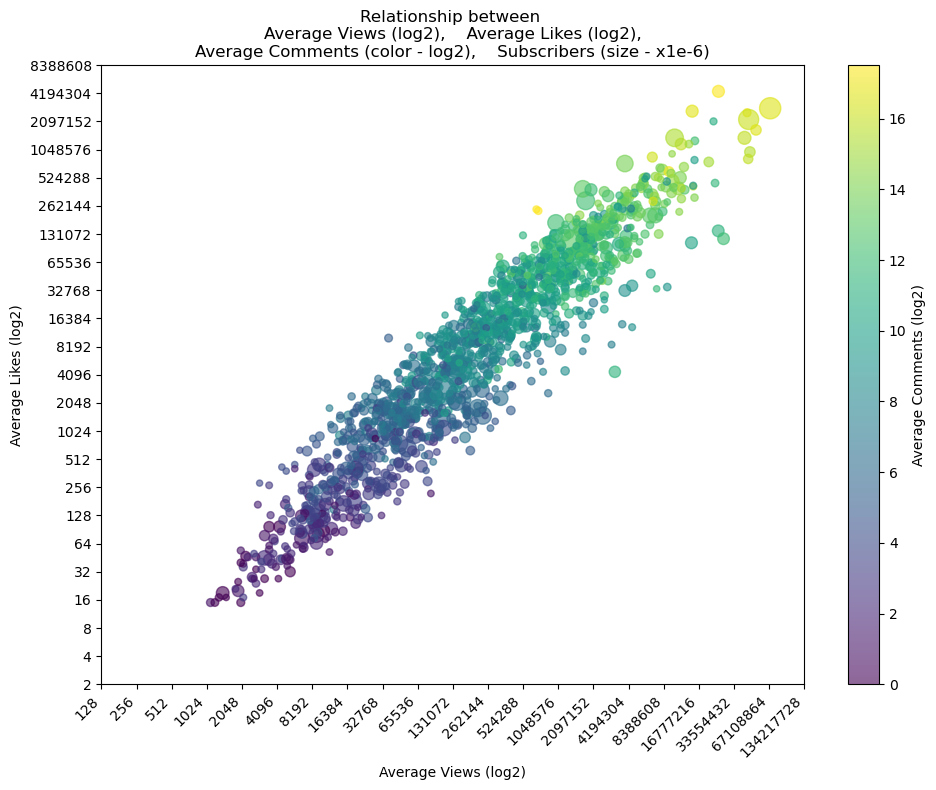

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(np.log2(stacked_df['Average_view']), np.log2(stacked_df['Average_likes']), c=np.log2(stacked_df['Average_comments']), s=stacked_df['Subscribers']*0.000002, cmap='viridis', alpha=0.6)  # Apply logarithmic scaling to subscriber sizes

# Add labels and title
plt.xlabel('Average Views (log2)')
plt.ylabel('Average Likes (log2)')
plt.title('Relationship between \nAverage Views (log2),    Average Likes (log2),\nAverage Comments (color - log2),    Subscribers (size - x1e-6)')

# Add colorbar
plt.colorbar(scatter, label='Average Comments (log2)')

# Set x and y ticks to represent powers of 2
min_view = stacked_df['Average_view'].replace(0, np.nan).min()  # Replace zero with NaN to avoid log(0)
min_likes = stacked_df['Average_likes'].replace(0, np.nan).min()
x_ticks = [2**i for i in range(int(np.floor(np.log2(min_view))), int(np.ceil(np.log2(stacked_df['Average_view'].max()))) + 1)]
y_ticks = [2**i for i in range(int(np.floor(np.log2(min_likes))), int(np.ceil(np.log2(stacked_df['Average_likes'].max()))) + 1)]
plt.xticks(np.log2(x_ticks), x_ticks)
plt.yticks(np.log2(y_ticks), y_ticks)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


# December

C:\Users\aKost\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


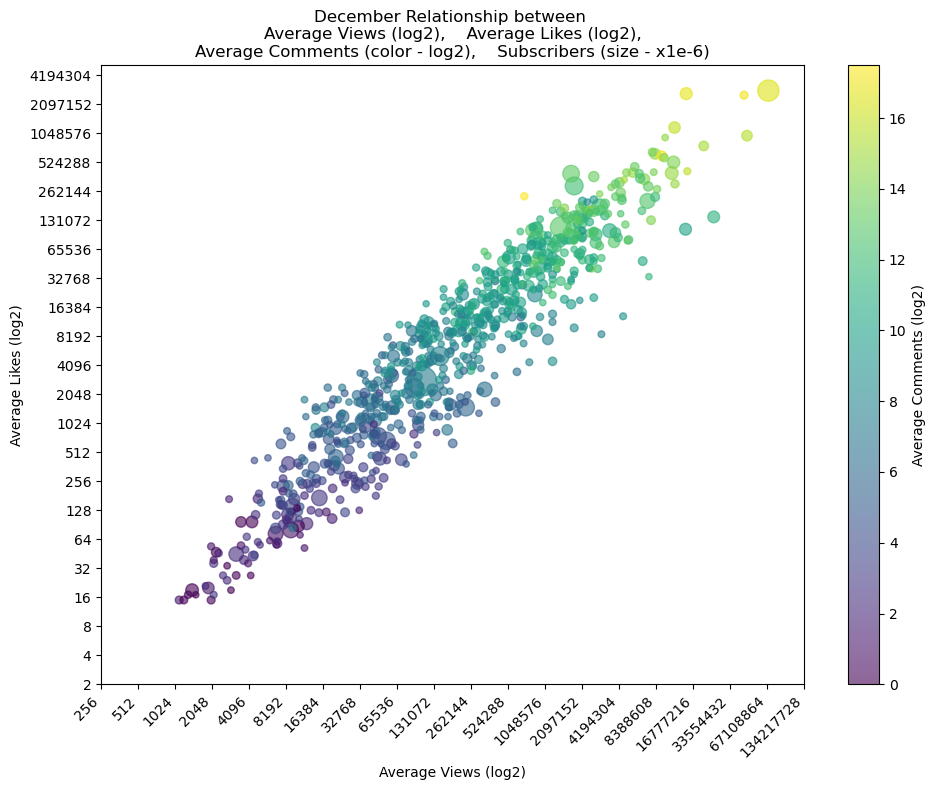

In [12]:
dec = pd.read_csv("../Resources/Dec_clean_data.csv")

numeric_cols = ['Subscribers', 'Average_view', 'Average_likes', 'Average_comments']

# Loop through each column name in the numeric_cols list.
for col in numeric_cols:
    # Apply the convert_to_numeric function to each column in the DataFrame 'stacked_df'.
    dec[col] = dec[col].apply(convert_to_numeric)


# DECEMBER
# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(np.log2(dec['Average_view']), np.log2(dec['Average_likes']), c=np.log2(dec['Average_comments']), s=dec['Subscribers']*0.000002, cmap='viridis', alpha=0.6)  # Apply logarithmic scaling to subscriber sizes

# Add labels and title
plt.xlabel('Average Views (log2)')
plt.ylabel('Average Likes (log2)')
plt.title('December Relationship between \nAverage Views (log2),    Average Likes (log2),\nAverage Comments (color - log2),    Subscribers (size - x1e-6)')

# Add colorbar
plt.colorbar(scatter, label='Average Comments (log2)')

# Set x and y ticks to represent powers of 2
min_view = dec['Average_view'].replace(0, np.nan).min()  # Replace zero with NaN to avoid log(0)
min_likes = dec['Average_likes'].replace(0, np.nan).min()
x_ticks = [2**i for i in range(int(np.floor(np.log2(min_view))), int(np.ceil(np.log2(dec['Average_view'].max()))) + 1)]
y_ticks = [2**i for i in range(int(np.floor(np.log2(min_likes))), int(np.ceil(np.log2(dec['Average_likes'].max()))) + 1)]
plt.xticks(np.log2(x_ticks), x_ticks)
plt.yticks(np.log2(y_ticks), y_ticks)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


# November

In [13]:
nov = pd.read_csv("../Resources/Nov_clean_data.csv")
nov.head()

,s.no,Youtube_channel,Youtuber_name,Category,Subscribers,Country,\r\nViews (Avg.),Average_likes,Average_comments,Sub-category,Date
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,Other,11/28/2022
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,Unknown,9.5M,48.3K,0,Other,11/19/2022
2,3,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,Other,11/7/2022
3,4,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,11/27/2022
4,5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,102.5M,Unknown,2.4M,15.7K,0,Toys,11/2/2022


In [14]:
nov = nov.rename(columns={'\r\nViews (Avg.)':'Average_view'})
nov.head()

,s.no,Youtube_channel,Youtuber_name,Category,Subscribers,Country,Average_view,Average_likes,Average_comments,Sub-category,Date
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,Other,11/28/2022
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,Unknown,9.5M,48.3K,0,Other,11/19/2022
2,3,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,Other,11/7/2022
3,4,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,11/27/2022
4,5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,102.5M,Unknown,2.4M,15.7K,0,Toys,11/2/2022


In [15]:
numeric_cols = ['Subscribers', 'Average_view', 'Average_likes', 'Average_comments']

# Loop through each column name in the numeric_cols list.
for col in numeric_cols:
    # Apply the convert_to_numeric function to each column in the DataFrame 'stacked_df'.
    nov[col] = nov[col].apply(convert_to_numeric)

In [16]:
nov.head()

,s.no,Youtube_channel,Youtuber_name,Category,Subscribers,Country,Average_view,Average_likes,Average_comments,Sub-category,Date
0,1,tseries,T-Series,Music & Dance,229500000.0,India,103800.0,2800.0,158.0,Other,11/28/2022
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146600000.0,Unknown,9500000.0,48300.0,0.0,Other,11/19/2022
2,3,PewDiePie,PewDiePie,Animation,111600000.0,United States,1400000.0,110700.0,7800.0,Other,11/7/2022
3,4,MrBeast6000,MrBeast,Video games,109100000.0,United States,38400000.0,3100000.0,56700.0,Humor,11/27/2022
4,5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,102500000.0,Unknown,2400000.0,15700.0,0.0,Toys,11/2/2022


C:\Users\aKost\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


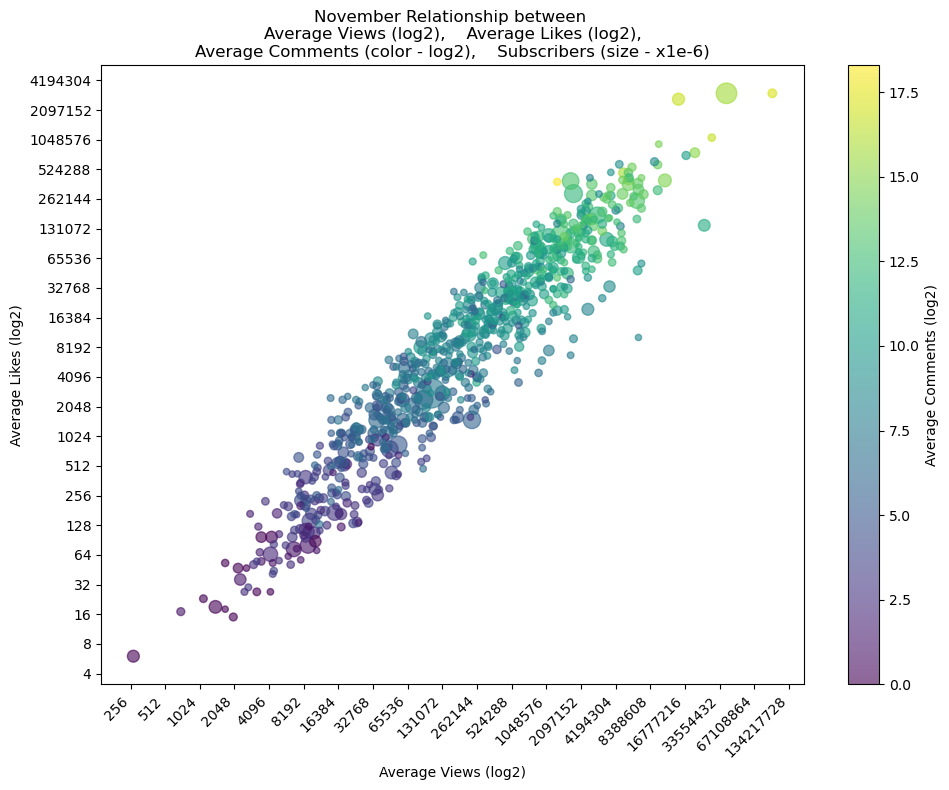

In [17]:
# NOVEMBER
# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(np.log2(nov['Average_view']), np.log2(nov['Average_likes']), c=np.log2(nov['Average_comments']), s=nov['Subscribers']*0.000002, cmap='viridis', alpha=0.6)  # Apply logarithmic scaling to subscriber sizes

# Add labels and title
plt.xlabel('Average Views (log2)')
plt.ylabel('Average Likes (log2)')
plt.title('November Relationship between \nAverage Views (log2),    Average Likes (log2),\nAverage Comments (color - log2),    Subscribers (size - x1e-6)')

# Add colorbar
plt.colorbar(scatter, label='Average Comments (log2)')

# Set x and y ticks to represent powers of 2
min_view = nov['Average_view'].replace(0, np.nan).min()  # Replace zero with NaN to avoid log(0)
min_likes = nov['Average_likes'].replace(0, np.nan).min()
x_ticks = [2**i for i in range(int(np.floor(np.log2(min_view))), int(np.ceil(np.log2(nov['Average_view'].max()))) + 1)]
y_ticks = [2**i for i in range(int(np.floor(np.log2(min_likes))), int(np.ceil(np.log2(nov['Average_likes'].max()))) + 1)]
plt.xticks(np.log2(x_ticks), x_ticks)
plt.yticks(np.log2(y_ticks), y_ticks)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


# September

C:\Users\aKost\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


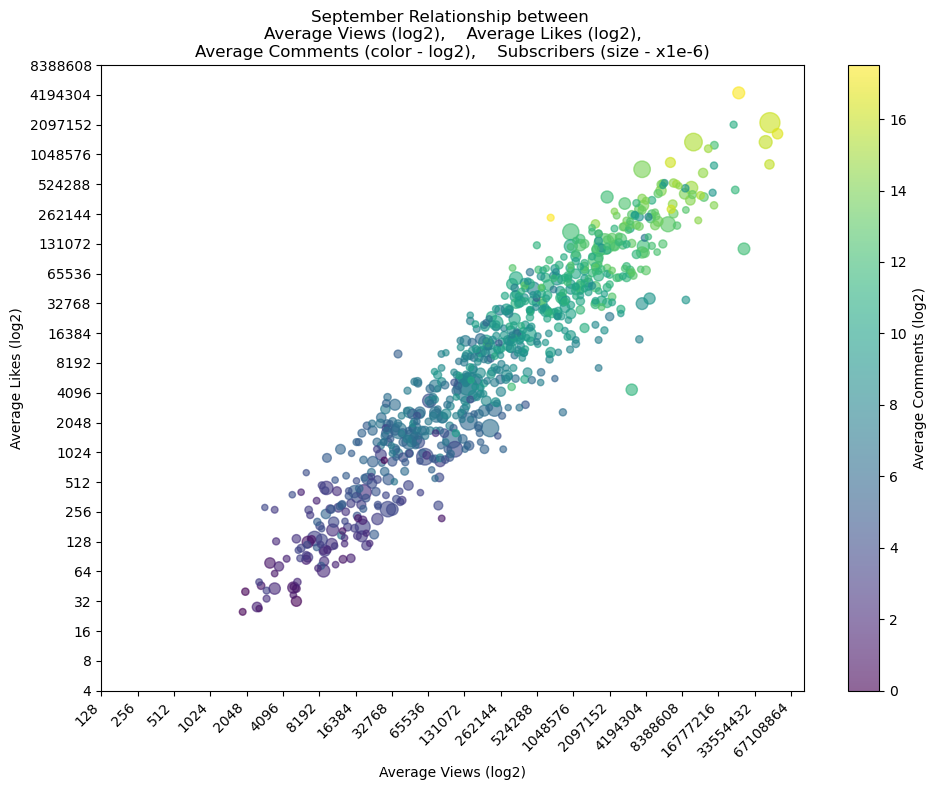

In [18]:
sep = pd.read_csv("../Resources/Sept_clean_data.csv") 
numeric_cols = ['Subscribers', 'Average_view', 'Average_likes', 'Average_comments']

# Loop through each column name in the numeric_cols list.
for col in numeric_cols:
    # Apply the convert_to_numeric function to each column in the DataFrame 'stacked_df'.
    sep[col] = sep[col].apply(convert_to_numeric)


# DECEMBER
# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(np.log2(sep['Average_view']), np.log2(sep['Average_likes']), c=np.log2(sep['Average_comments']), s=sep['Subscribers']*0.000002, cmap='viridis', alpha=0.6)  # Apply logarithmic scaling to subscriber sizes

# Add labels and title
plt.xlabel('Average Views (log2)')
plt.ylabel('Average Likes (log2)')
plt.title('September Relationship between \nAverage Views (log2),    Average Likes (log2),\nAverage Comments (color - log2),    Subscribers (size - x1e-6)')

# Add colorbar
plt.colorbar(scatter, label='Average Comments (log2)')

# Set x and y ticks to represent powers of 2
min_view = sep['Average_view'].replace(0, np.nan).min()  # Replace zero with NaN to avoid log(0)
min_likes = sep['Average_likes'].replace(0, np.nan).min()
x_ticks = [2**i for i in range(int(np.floor(np.log2(min_view))), int(np.ceil(np.log2(sep['Average_view'].max()))) + 1)]
y_ticks = [2**i for i in range(int(np.floor(np.log2(min_likes))), int(np.ceil(np.log2(sep['Average_likes'].max()))) + 1)]
plt.xticks(np.log2(x_ticks), x_ticks)
plt.yticks(np.log2(y_ticks), y_ticks)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [19]:
dec.to_csv("s_dec.csv", index=False)
nov.to_csv("s_nov.csv", index=False)
sep.to_csv("s_sep.csv", index=False)

In [20]:
stacked_df.to_csv("s_all.csv", index=False)